References:
- [pca in sklearn](https://www.kdnuggets.com/2023/05/principal-component-analysis-pca-scikitlearn.html)

In [16]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [12]:
wine_data = datasets.load_wine(as_frame=True)
df = wine_data.data
df.shape

(178, 13)

In [7]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

The number of principal components is the number of dimensions that you’d like to reduce the feature space to.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

The attribute components_ stores the directions of maximum variance (the principal components).

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit_transform(scaled_df);
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

The `explained_variance_ratio_` attribute captures the ratio of the total variance each principal component captures. Sowe can sum up the ratios to get the total variance in the chosen number of components.

Three principal components capture over 66.5% of total variance in the dataset.

In [15]:
sum(pca.explained_variance_ratio_)

0.6652996889318527

Analyzing the Change in Explained Variance Ratio

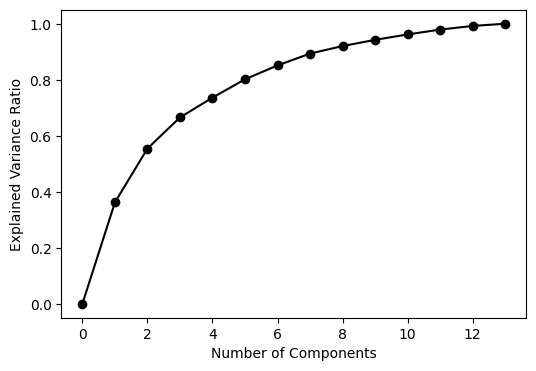

In [19]:
nums = np.arange(14)

var_ratio = []
for n in nums:
    pca = PCA(n_components=n)
    pca.fit_transform(scaled_df)
    var_ratio.append(sum(pca.explained_variance_ratio_))

plt.figure(figsize=(6, 4))
plt.plot(nums, var_ratio, 'o-', color='black')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio');